In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-evd-bauerfike)


```{index} Julia; adjoint, Julia; \'
```

We first define a hermitian matrix. Note that the `'` operation is the adjoint and includes complex conjugation.

In [2]:
n = 7
A = randn(n, n) + 1im * randn(n, n)
A = (A + A') / 2

7×7 Matrix{ComplexF64}:
  0.311278+0.0im        -0.270341-0.186446im  …    0.29737-0.175993im
 -0.270341+0.186446im    -1.31958+0.0im          -0.318457-0.441482im
  0.542717+0.210611im    0.480783-0.408239im     0.0385852+1.25806im
 -0.344949+0.221065im   -0.171334+1.07852im      -0.325689+0.248905im
 -0.261615+0.689518im   -0.424449+0.318414im     -0.276944+1.47686im
 0.0352189-0.699733im  -0.0252498-0.44772im   …   -0.80234+0.615143im
   0.29737+0.175993im   -0.318457+0.441482im      -1.08682+0.0im

```{index} Julia; cond
```

We confirm that the matrix $\mathbf{A}$ is normal by checking that $\kappa(\mathbf{V}) = 1$ (to within roundoff).

In [3]:
λ, V = eigen(A)
@show cond(V);

cond(V) = 1.0000000000000007

Now we perturb $\mathbf{A}$ and measure the effect on the eigenvalues. The Bauer–Fike theorem uses absolute differences, not relative ones.
```{tip}
:class: dropdown
Since the ordering of eigenvalues can change, we look at all pairwise differences and take the minima.
```

In [4]:
ΔA = 1e-8 * normalize(randn(n, n) + 1im * randn(n, n))
λ̃ = eigvals(A + ΔA)
dist = minimum([abs(x - y) for x in λ̃, y in λ], dims=2)

7×1 Matrix{Float64}:
 4.899397714410723e-10
 9.06560796985625e-10
 5.982623582009868e-10
 2.331521219886482e-9
 1.957511538234729e-9
 9.330054797299565e-10
 1.5965123603587502e-9

As promised, the perturbations in the eigenvalues do not exceed the normwise perturbation to the original matrix.

Now we see what happens for a triangular matrix.

In [5]:
n = 20
x = 1:n
A = triu(x * ones(n)')
A[1:5, 1:5]

5×5 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0
 0.0  2.0  2.0  2.0  2.0
 0.0  0.0  3.0  3.0  3.0
 0.0  0.0  0.0  4.0  4.0
 0.0  0.0  0.0  0.0  5.0

This matrix is not especially close to normal.

In [6]:
λ, V = eigen(A)
@show cond(V);

cond(V) = 6.149906664929389e9

As a result, the eigenvalues can change by a good deal more.

In [7]:
ΔA = 1e-8 * normalize(randn(n, n) + 1im * randn(n, n))
λ̃ = eigvals(A + ΔA)
dist = minimum([abs(x - y) for x in λ̃, y in λ], dims=2)
BF_bound = cond(V) * norm(ΔA)
@show maximum(dist), BF_bound;

(maximum(dist), BF_bound) = (0.40912004912955735, 61.499066649293894)


If we plot the eigenvalues of many perturbations, we get a cloud of points that roughly represents all the possible eigenvalues when representing this matrix with single-precision accuracy.

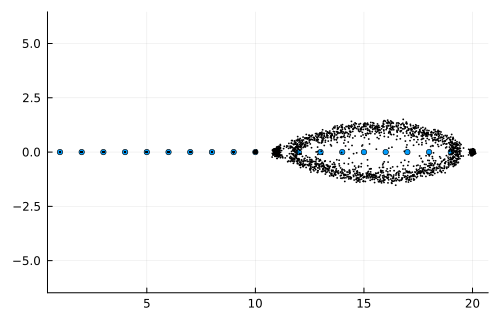

In [8]:
plt = scatter(λ, zeros(n), aspect_ratio=1)
for _ in 1:200
    ΔA = eps(Float32) * normalize(randn(n, n) + 1im * randn(n, n))
    λ̃ = eigvals(A + ΔA)
    scatter!(real(λ̃), imag(λ̃), m=1, color=:black)
end
plt

The plot shows that some eigenvalues are much more affected than others. This situation is not unusual, but it is not explained by the Bauer–Fike theorem.